# 強制振動

## Reference

- [【大学物理】力学入門⑪(強制振動)【力学】](https://www.youtube.com/watch?v=ibVxnc0jzn4&t=9s&ab_channel=%E4%BA%88%E5%82%99%E6%A0%A1%E3%81%AE%E3%83%8E%E3%83%AA%E3%81%A7%E5%AD%A6%E3%81%B6%E3%80%8C%E5%A4%A7%E5%AD%A6%E3%81%AE%E6%95%B0%E5%AD%A6%E3%83%BB%E7%89%A9%E7%90%86%E3%80%8D)
- [入力ありの質量-ばね-ダンパーモデルの運動を求める](https://tajimarobotics.com/forced-mass-spring-damper-system/)


## モデル

![](../resource/MSD-System.png)  
出典: [質量-ばね-ダンパーシステムの運動を求める](https://tajimarobotics.com/damped-mass-spring-system/)

## 質量ばねモデル

簡略化のため、まずダンパーなしの質量ばねモデルを考える。  

運動方程式は

$$
m\ddot{x} = -kx + F\cos(\omega t)
$$

$-kx$はばねの復元力  
$F\cos(\omega t)$は振動する外力


運動方程式を整理すると以下のような微分方程式となる

$$
\ddot{x} = -\omega_0^2 x + f\cos(\omega t) \\
(\omega_0 = \sqrt{\frac{k}{m}}, f=\frac{F}{m})
$$

時間tに関してxが含まれない項がある。  
このような方程式を"非斉次の微分方程式"と呼ぶ。  

方程式を満たす$x$の解(特解)を探す必要がある。  


### 特解を求める

微分方程式の項を見ると三角関数が含まれているため、$x$の解は同じ各振動数を含む三角関数であることが推測できる。  

$x = a\cos(\omega t)$ として代入すると

$$
-a\omega^2\cos(\omega t) = -a\omega_0^2\cos(\omega t) + f\cos(\omega t) \\
a = -\frac{f}{\omega^2-\omega_0^2}
$$

よって、

$$
x = -\frac{f}{\omega^2-\omega_0^2}\cos(\omega t)
$$

が特解となる。  

$\omega \fallingdotseq \omega_0$の時振幅が非常に大きくなる。  
このような事象を"共振"と呼ぶ。


### 一般解を求める

外力がない時を考えると

$$
\ddot{x} = -\omega_0^2 x
$$

となり、単振動の微分方程式となる。  
(２回微分で符号が変わっていることから、三角関数であることは想像できる。)

$$
x = A\sin(\omega_0t) + B\cos(\omega_0t)
$$

上記の解に特解を加えると

$$
x = A\sin(\omega_0t) + B\cos(\omega_0t) -\frac{f}{\omega^2-\omega_0^2}\cos(\omega t)
$$

となる


### 定数項を求める

初期条件を$x(0)=0, \dot{x}(0)=0$とすると、  
$A=0, B=\frac{f}{\omega^2-\omega_0^2}$となる  

よって

$$
\begin{equation}
\begin{split}
x &= \frac{f}{\omega^2-\omega_0^2}\cos(\omega_0t) - \frac{f}{\omega^2-\omega_0^2}\cos(\omega t) \\
  &= \frac{f}{\omega^2-\omega_0^2}(\cos(\omega_0t) - \cos(\omega t)) \\
  &= \frac{2f}{(\omega+\omega_0)(\omega-\omega_0)}\sin(\frac{\omega_0+\omega}{2})t\sin(\frac{\omega_0-\omega}{2})t \\
\end{split}
\end{equation}
$$

(和積の公式: $\sin\alpha\sin\beta = \frac{1}{2}\{\cos(\alpha + \beta) - \cos(\alpha - \beta)\}$)


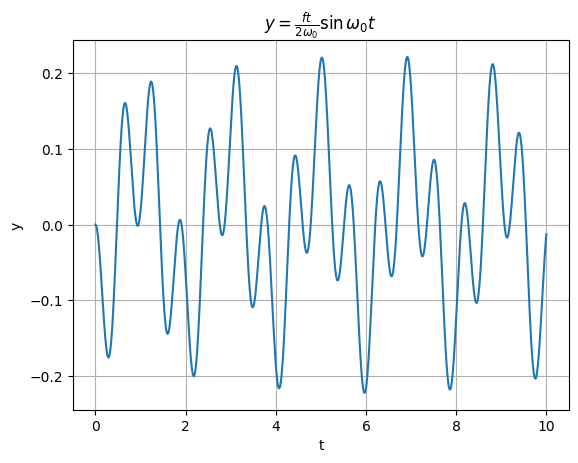

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vibration(m, k, f, omega, t_start, t_end, num_points):
    """
    与えられた方程式をプロットする関数

    Args:
        m: 質量[kg]
        k: ばね係数[N/m]
        F: 外力[N]
        omega: 外力振動角速度[rad/s]
        t_start: 時間 t の開始値
        t_end: 時間 t の終了値
        num_points: プロットする点の数
    """
    # 係数を計算
    omega_0 = np.sqrt(k/m) # 固有振動数
    f = F/m

    t = np.linspace(t_start, t_end, num_points)
    y = (2 * f) / ((omega + omega_0) * (omega - omega_0)) * np.sin((omega_0 + omega) /2 * t) * np.sin((omega_0 - omega) /2 * t)

    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(r'$y = \frac{ft}{2\omega_0}\sin\omega_0t$')  # LaTeX形式でタイトルを表示
    plt.grid(True)
    plt.show()

k = 10 # ばね係数[N/m]
m = 1 # 質量[kg]
F = 10 # 外力[N]
omega = 10
plot_vibration(m, k, F, omega, t_start=0, t_end=10, num_points=1000)

### 振動数($\omega$)と固有振動数($\omega_0$)が一致した時

$\omega -> \omega_0$の極限を考える

$\omega - \omega_0 = \Delta\omega$とすると

$$
x = \frac{2f}{\omega+\omega_0}\sin(\frac{\omega_0+\omega}{2})t\frac{t}{2}\frac{\sin(\frac{\Delta\omega}{2})t}{\frac{\Delta\omega}{2}t} \\
$$


$\lim_{n\to 0}\frac{\sin x}{x} = 1$より

$\omega -> \omega_0 (\Delta\omega -> 0)$の極限は

$$
\frac{ft}{2\omega_0}\sin\omega_0t
$$

$\frac{ft}{2\omega_0}$は時間とともに振幅が増大することを意味する


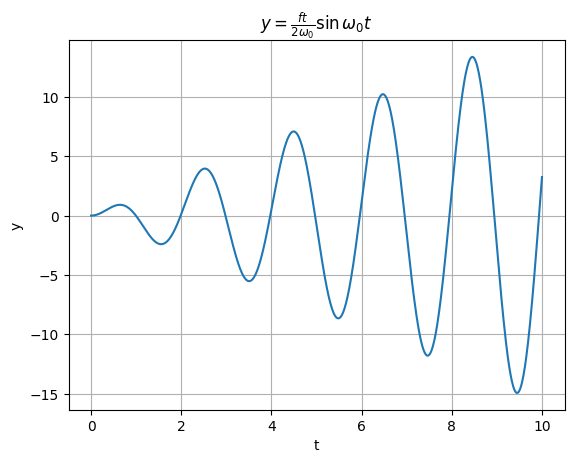

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_resonance_vibration(m, k, f, t_start, t_end, num_points):
    """
    与えられた方程式をプロットする関数

    Args:
        m: 質量[kg]
        k: ばね係数[N/m]
        F: 外力[N]
        t_start: 時間 t の開始値
        t_end: 時間 t の終了値
        num_points: プロットする点の数
    """
    # 係数を計算
    omega_0 = np.sqrt(k/m) # 固有振動数
    f = F/m

    t = np.linspace(t_start, t_end, num_points)
    y = (f * t / (2 * omega_0)) * np.sin(omega_0 * t)

    plt.plot(t, y)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(r'$y = \frac{ft}{2\omega_0}\sin\omega_0t$')  # LaTeX形式でタイトルを表示
    plt.grid(True)
    plt.show()

k = 10 # ばね係数[N/m]
m = 1 # 質量[kg]
F = 10 # 外力[N]
plot_resonance_vibration(m, k, F, t_start=0, t_end=10, num_points=1000)

## 質量ばねダンパーモデル

## 運動方程式

$$
m\ddot{x} = -kx - c\dot{x} + F\cos(\omega t)
$$

$-kx$はばねの復元力  
$b\dot{x}$はダンパーの抵抗力  
$F\cos(\omega t)$は振動する外力

## 微分方程式を解く

質量ばねモデルと同じ要領で解く  
運動方程式を整理すると以下のような微分方程式となる

$$
\ddot{x} = -\omega_0^2 x - 2\gamma\dot{x} + f\cos(\omega t) \\
(\omega_0 = \sqrt{\frac{k}{m}}, \gamma=\frac{c}{2m}, f=\frac{F}{m})
$$

(時間tに関してxが含まれない項がある -> 非斉次方程式)


### 特解を求める

微分方程式の項を見ると三角関数が含まれているため、$x$の解は同じ各振動数を含む三角関数であることが推測できる。  

$x = A\cos(\omega t) + B\sin(\omega t)$ として代入すると  

ダンパーを使用しているため、応答と外力の位相がずれることがある。  
位相ずれを表現するために、sin関数とcos関数を含む線形結合を仮定する。　　

$$
-A\omega^2\cos(\omega t) - B\omega^2\sin(\omega t) = \\
-\omega_0^2(A\cos(\omega t) + B\sin(\omega t)) -2\gamma(-A\omega\sin(\omega t) + B\omega\cos(\omega t))+ f\cos(\omega t) \\
$$

$t=0, t=\frac{\pi}{2\omega}$の連立方程式は

$$
-A\omega^2 + A\omega_0^2 + 2B\omega\gamma = f \\
-B\omega^2 + B\omega_0^2 - 2A\omega\gamma = 0
$$

下式を$B$について解くと

$$
B = \frac{2A\omega\gamma}{\omega_0^2 - \omega^2}
$$

これを上式に代入すると、

$$
-A\omega^2 + A\omega_0^2 + 2\frac{2A\omega\gamma}{\omega_0^2 - \omega^2}\omega\gamma = f \\
A(\omega_0^2 - \omega)^2 + 4A\omega^2\gamma^2 = f(\omega_0^2 - \omega^2) \\
A = \frac{f(\omega_0^2 - \omega^2)}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}
$$

$$
B = \frac{2f\omega\gamma}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}
$$

以上より

$$
x = \frac{f(\omega_0^2 - \omega^2)}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}\cos(\omega t) + \frac{2f\omega\gamma}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}\sin(\omega t)
$$

が特解となる。  

ダンパーの減衰係数$\gamma$が低いと、質量ばねモデルと同様に$\omega \fallingdotseq \omega_0$の時に振幅が大きくなり共振が発生する。  


### 一般解を求める

同次方程式xに関する一般解は減衰振動の解析で求めている結果より

\begin{equation*}
   f(x) =
   \begin{cases}
      C_1e^{\lambda_1 t} + C_2 e^{\lambda_2 t} & \quad (\gamma > \omega_0) \\
      (At+B)e^{-\gamma t}  & \quad (\gamma = \omega_0) \\
      e^{-\gamma t}\{A\cos(\omega t)+ B\sin(\omega t)\} & \quad (\gamma < \omega_0)
   \end{cases}
\end{equation*}

いずれも定常状態($t -> \inf$)で無視できるため、一般解は特解になる

$$
x = \frac{f(\omega_0^2 - \omega^2)}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}\cos(\omega t) + \frac{2f\omega\gamma}{(\omega_0^2 - \omega^2)^2 + 4\omega^2\gamma^2}\sin(\omega t)
$$


coefficients: omega_0=4.47213595499958, gamma=1.0
constat: A=-0.07999999999999996, B=0.16000000000000003


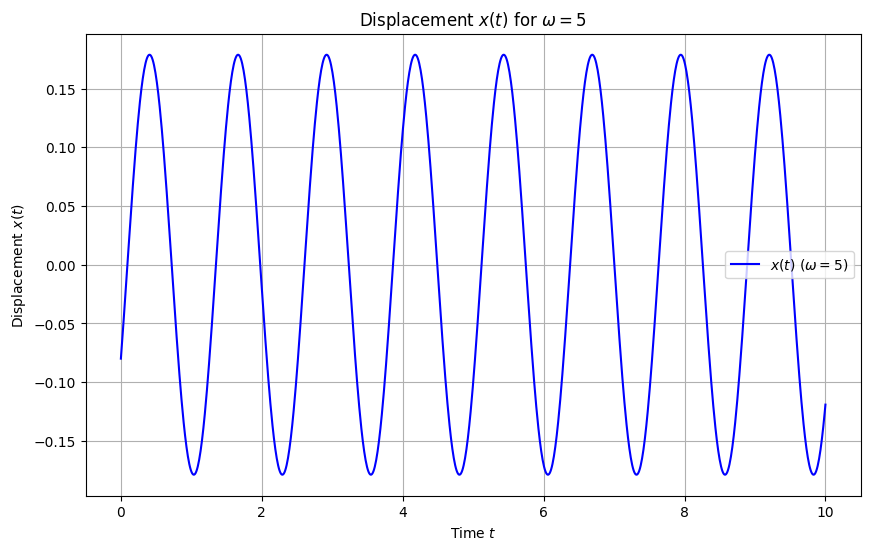

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 参考資料とは運動方程式の入力条件がsinとcosで違うため、プロットしている位相はずれている

def plot_displacement_with_vibration_msd(m, k, c, F, omega):
  """
  与えられた方程式をプロットする関数
  Args:
      m: 質量[kg]
      k: ばね係数[N/m]
      c: 減衰係数[N/(m/s)]
      F: 外力[N]
      omega: 外力振動角速度[rad/s]
      t_start: 時間 t の開始値
      t_end: 時間 t の終了値
      num_points: プロットする点の数
  """
  
  # 係数を計算
  omega_0 = np.sqrt(k/m) # 固有振動数
  gamma = gamma = c / (2 * m)
  f = F/m
  print(f"coefficients: {omega_0=}, {gamma=}")

  # 時間の範囲
  t_values = np.linspace(0, 10, 1000)

  # 定常状態の解
  A = (f * (omega_0**2 - omega**2)) / ((omega_0**2 - omega**2)**2 + 4 * omega**2 * gamma**2)
  B = (2 * f * omega * gamma) / ((omega_0**2 - omega**2)**2 + 4 * omega**2 * gamma**2)
  print(f"constat: {A=}, {B=}")

  # x(t) の計算
  x_t = A * np.cos(omega * t_values) + B * np.sin(omega * t_values)

  # プロット
  plt.figure(figsize=(10, 6))
  plt.plot(t_values, x_t, label=f"$x(t)$ ($\omega = {omega}$)", color="blue")
  plt.xlabel("Time $t$")
  plt.ylabel("Displacement $x(t)$")
  plt.title(f"Displacement $x(t)$ for $\omega = {omega}$")
  plt.legend()
  plt.grid()
  plt.show()

m = 5 # 質量[kg]
k = 100 # ばね係数[N/m]
c = 10  # 減衰係数
F = 10 # 外力[N]
omega = 5
plot_displacement_with_vibration_msd(m, k, c, F, omega)

## 解析

三角関数の合成: $a\sin\theta + b\cos\theta = \sqrt{a^2 + b^2}\cos(\theta + \beta)$を用いて解析する

一般解より


$$
\begin{equation}
\begin{split}
x &= A\cos(\omega t) + B\sin(\omega t) \\
  &= \sqrt{A^2 + B^2}\cos(\omega t - \arctan\frac{A}{B}) \\
\end{split}
\end{equation}
$$

よって振幅は$\sqrt{A^2 + B^2}$, 位相は$\arctan\frac{A}{B}$となる



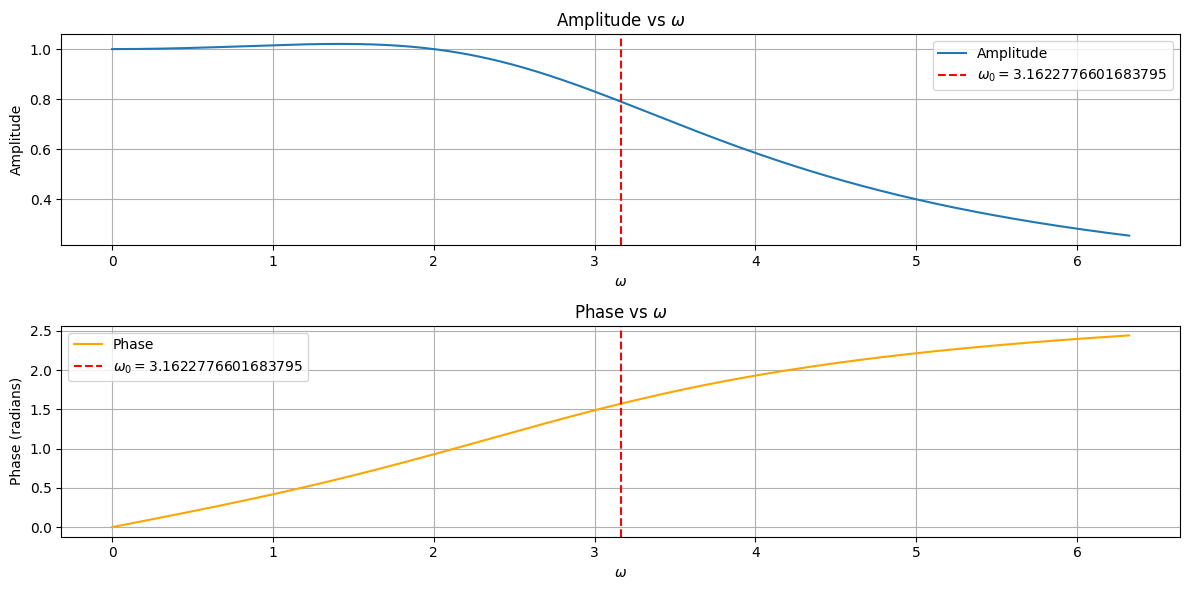

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vibration_msd(m, k, c, F):
  """
  与えられた方程式をプロットする関数
  Args:
      m: 質量[kg]
      k: ばね係数[N/m]
      c: 減衰係数[N/(m/s)]
      F: 外力[N]
      t_start: 時間 t の開始値
      t_end: 時間 t の終了値
      num_points: プロットする点の数
  """
  
  # 係数を計算
  omega_0 = np.sqrt(k/m) # 固有振動数
  gamma = gamma = c / (2 * m)
  f = F/m

  # 外力の角周波数の範囲
  omega_values = np.linspace(0, 2 * omega_0, 500)

  # 振幅と位相の計算
  A = (f * (omega_0**2 - omega_values**2)) / ((omega_0**2 - omega_values**2)**2 + 4 * omega_values**2 * gamma**2)
  B = (2 * f * omega_values * gamma) / ((omega_0**2 - omega_values**2)**2 + 4 * omega_values**2 * gamma**2)

  # 振幅の計算
  amplitude = np.sqrt(A**2 + B**2)

  # 位相の計算 (ラジアン単位)
  phase = np.arctan2(B, A)

  # プロット
  plt.figure(figsize=(12, 6))

  # 振幅のプロット
  plt.subplot(2, 1, 1)
  plt.plot(omega_values, amplitude, label="Amplitude")
  plt.axvline(x=omega_0, color='r', linestyle='--', label=f"$\omega_0 = {omega_0}$")
  plt.xlabel("$\omega$")
  plt.ylabel("Amplitude")
  plt.title("Amplitude vs $\omega$")
  plt.legend()
  plt.grid()

  # 位相のプロット
  plt.subplot(2, 1, 2)
  plt.plot(omega_values, phase, label="Phase", color="orange")
  plt.axvline(x=omega_0, color='r', linestyle='--', label=f"$\omega_0 = {omega_0}$")
  plt.xlabel("$\omega$")
  plt.ylabel("Phase (radians)")
  plt.title("Phase vs $\omega$")
  plt.legend()
  plt.grid()

  plt.tight_layout()
  plt.show()

m = 1 # 質量[kg]
k = 10 # ばね係数[N/m]
c = 4.0  # 減衰係数
F = 10 # 外力[N]
plot_vibration_msd(m, k, c, F)